In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sc

plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16, loc="upper left")
plt.rc("figure", figsize=(7, 5))


In [2]:
## Fresnels laws as functions

def rp(n1, n2, t1, t2) :
    if(isinstance(t1, list) == True) :
        rp_list = list()
        for i in range(len(t1)) :
            rp = (n2*np.cos(t1[i])-n1*np.cos(t2[i]))/(n2*np.cos(t1[i])+n1*np.cos(t2[i]))
            rp_list.append(rp)
        return rp_list
    
    else :
        return (n2*np.cos(t1)-n1*np.cos(t2))/(n2*np.cos(t1)+n1*np.cos(t2))

def tp(n1, n2, t1, t2) :
    if(isinstance(t1, list) == True) :
        tp_list = list()
        for i in range(len(t1)) :
            tp = (2*n1*np.cos(t1[i]))/(n2*np.cos(t1[i])+n1*np.cos(t2[i]))
            tp_list.append(tp)
        return tp_list
    
    else :
        return (2*n1*np.cos(t1))/(n2*np.cos(t1)+n1*np.cos(t2))

def rs(n1, n2, t1, t2) :
    if(isinstance(t1, list) == True) :
        rs_list = list()
        for i in range(len(t1)) :
            rs = (n1*np.cos(t1[i])-n2*np.cos(t2[i]))/(n1*np.cos(t1[i])+n2*np.cos(t2[i]))
            rs_list.append(rs)
        return rs_list
    
    else :
        return (n1*np.cos(t1)-n2*np.cos(t2))/(n1*np.cos(t1)+n2*np.cos(t2))
    
def ts(n1, n2, t1, t2) :
    if(isinstance(t1, list) == True) :
        ts_list = list()
        for i in range(len(t1)) :
            ts = (2*n1*np.cos(t1[i]))/(n1*np.cos(t1[i])+n2*np.cos(t2[i]))
            ts_list.append(ts)
        return ts_list
    
    else :
        return (2*n1*np.cos(t1))/(n1*np.cos(t1)+n2*np.cos(t2))

def Rp(t1, t2) :
    if(isinstance(t1, list) == True) :
        Rp_list = list()
        for i in range(len(t1)) :
            Rp = (np.tan(t1[i]-t2[i])**2)/(np.tan(t1[i]+t2[i])**2)
            Rp_list.append(Rp)
        return Rp_list
    
    else : 
        return (np.tan(t1-t2)**2)/(np.tan(t1+t2)**2)

def Tp(t1, t2) :
    if(isinstance(t1, list) == True) : 
        Tp_list = list()
        for i in range(len(t1)) :
            Tp = (np.sin(2*t1[i])*np.sin(2*t2[i]))/(np.sin(t1[i]+t2[i])**2*np.cos(t1[i]-t2[i])**2)
            Tp_list.append(Tp)
        return Tp_list
    
    else : 
        return (np.sin(2*t1)*np.sin(2*t2))/(np.sin(t1+t2)**2*np.cos(t1-t2)**2)

def Rs(t1, t2) :
    if(isinstance(t1, list) == True) : 
        Rs_list = list()
        for i in range(len(t1)) : 
            Rs = (np.sin(t1[i]-t2[i])**2)/(np.sin(t1[i]+t2[i])**2)
            Rs_list.append(Rs)
        return Rs_list
    
    else : 
        return (np.sin(t1-t2)**2)/(np.sin(t1+t2)**2)

def Ts(t1, t2) :
    if(isinstance(t1, list) == True) : 
        Ts_list = list()
        for i in range(len(t1)) :
            Ts = (np.sin(2*t1[i])*np.sin(2*t2[i]))/(np.sin(t1[i]+t2[i])**2)
            Ts_list.append(Ts)
        return Ts_list
    
    else :
        return (np.sin(2*t1)*np.sin(2*t2))/(np.sin(t1+t2)**2)


In [3]:
## Conversion of degrees to radians

def dgr(degrees) : 
    return np.radians(degrees)

def rdn(radians) :
    return np.degrees(radians)


In [4]:
## Parameterization of theta_2

def thet2(thet1, n) : 
    # Used for list inputs
    if(isinstance(thet1, list) == True) :
        t2_list = list()
        for i in range(len(thet1)) :
            t2 = np.arcsin((n1*np.sin(thet1[i]))/n)
            t2_list.append(t2)
        return t2_list
    
    # Input is expected to be a single number.
    else :
        return np.arcsin(np.sin(thet1)/n)
    
print(thet2(t1_r[0], true_n))
print(thet2(t1_r, true_n))

NameError: name 't1_r' is not defined

In [5]:
## Calculation of background noise


In [8]:
import os
import time

start_time = time.time()

# Paths
path = r"C:\Users\Karsten\Eksperimental\Experimentel-Physics-2\Day2-P"
t_folder = r"\Transmitted"
r_folder = r"\Reflected"

# List of files

t_list = os.listdir(path+t_folder)
r_list = os.listdir(path+r_folder)

# Transmitted

v_tmean = []
th_1t = []
th_2t = []

# Reflected

v_rmean = []
th_1r = []
th_2r = []

# For loop for transmitted

for i in range(len(t_list)) :
    filepath = os.path.join(path+t_folder, t_list[i])
    data = np.genfromtxt(filepath, skip_header=3)
    
    v_list = []
    t1_s = ""
    t2_s = ""
    
    for k in range(len(data)) :
        v_list.append(data[k][1])
    v_tmean.append(np.mean(v_list))
    
    string = t_list[i][2:-5]
    first = True
    for k in range(len(string)) :
        if(first == False) : 
            if(string[k] == ".") : 
                t2_s = t2_s + "."
            if(string[k] != ".") : 
                t2_s = t2_s + string[k]
            
        if(first == True) :
            if(string[k] == ",") : 
                first = False
            if(string[k] == ".") :
                t1_s = t1_s + "."
            if((string[k] != ".") and (string[k] != ",")) : 
                t1_s = t1_s + string[k]
    
    th_1t.append(float(t1_s))
    th_2t.append(float(t2_s))    

if((len(th_1t) == len(t_list)) and (len(th_2t) == len(t_list))) : print('Succesfull: Transmitted')

# For loop over reflected

for i in range(len(r_list)) :
    filepath = os.path.join(path+r_folder, r_list[i])
    data = np.genfromtxt(filepath, skip_header=3)
    
    v_list = []
    t1_s = ""
    t2_s = ""
    
    for k in range(len(data)) :
        v_list.append(data[k][1])
    v_rmean.append(np.mean(v_list))
    
    string = t_list[i][2:-5]
    first = True
    for k in range(len(string)) :
        if(first == False) : 
            if(string[k] == ".") : 
                t2_s = t2_s + "."
            if(string[k] != ".") : 
                t2_s = t2_s + string[k]
            
        if(first == True) :
            if(string[k] == ",") : 
                first = False
            if(string[k] == ".") :
                t1_s = t1_s + "."
            if((string[k] != ".") and (string[k] != ",")) : 
                t1_s = t1_s + string[k]
    
    th_1r.append(float(t1_s))
    th_2r.append(float(t2_s))    

if((len(th_1r) == len(r_list)) and (len(th_2r) == len(r_list))) : print('Succesfull: Reflected')
    
# Time result

end_time = time.time()

print('Total elapsed time:', np.round(end_time-start_time,2), 's')


Succesfull: Transmitted
Succesfull: Reflected
Total elapsed time: 45.4 s


In [9]:
for i in range(len(th_1r)) :
    if(th_1r[i] != th_1t[i]) : print('Problem')
    if(th_2r[i] != th_2t[i]) : print('Problem')
        

In [10]:
print(th_1r, len(th_1r))
print(th_2r, len(th_2r))
print(th_1t, len(th_1t))
print(th_2t, len(th_2t))

[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 5.0, 50.0, 55.0, 60.0, 65.0, 70.0] 14
[3.0, 4.5, 6.0, 8.5, 10.0, 12.0, 14.0, 16.5, 1.5, 19.0, 21.5, 24.0, 28.5, 31.0] 14
[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 5.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 88.0] 18
[3.0, 4.5, 6.0, 8.5, 10.0, 12.0, 14.0, 16.5, 1.5, 19.0, 21.5, 24.0, 28.5, 31.0, 35.0, 39.5, 45.0, 46.0] 18


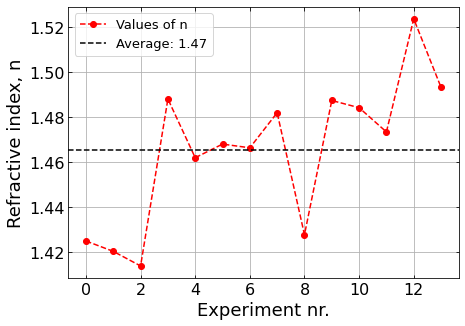

In [11]:
## Calculation of the refractive index for P-POLARISED LIGHT

n1 = 1                             # Refracetive index of first material (air)

incidens = []
reflected = []

if(len(th_1r) > len(th_1t)) : 
    for i in range(len(th_1t)) :
        incidens.append(th_1t[i]) # fejl
        reflected.append(th_2t[i]) #fejl
if(len(th_1r) <= len(th_1t)) :
    for i in range(len(th_1r)) : 
        incidens.append(th_1t[i])
        reflected.append(th_2r[i])

reflected_true = []
for i in range(len(reflected)) :
    reflected_true.append(incidens[i]-reflected[i])

theta_1 = incidens     # Angle of incidence
theta_2 = reflected_true    # Angle of refraction

t1_r = dgr(theta_1)
t2_r = dgr(theta_2)

def n_12(theta1, theta2) : 
    if(len(theta1) != len(theta2)) :
        return print('Lists are not the same length')
    
    n_list = list()
    for i in range(len(theta1)) :
        n = (n1*np.sin(theta1[i]))/np.sin(theta2[i])
        n_list.append(n)
    return n_list

n_list = np.array(n_12(t1_r, t2_r))
true_n = np.mean(n_list)

plt.plot(range(len(n_list)), n_list, 'o--', label='Values of n', color='r')
plt.axhline(true_n, ls='--', color='black', label='Average: {}'.format(np.round(true_n, 2)))
plt.xlabel('Experiment nr.')
plt.ylabel("Refractive index, n")
plt.legend(loc = 'upper left', fontsize=13)
plt.grid()


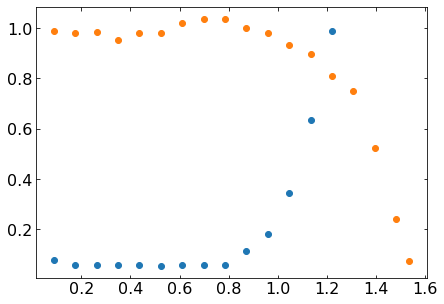

In [12]:
i90 = 1.636 # V

# Reflected

v_r = np.array(v_rmean)/i90

plt.plot(t1_r, v_r, 'o')

# Transmitted

v_t = np.array(v_tmean)/i90

plt.plot(dgr(th_1t), v_t, 'o')

In [13]:
print(true_n)

1.4653092385870263
